In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
from inspect import getsource
import os

from utils import MyResNet50

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
print(getsource(MyResNet50))

class MyResNet50:
    model = ResNet50(weights='imagenet')
    prediction_collector: dict = {}
    count_instances: int = 0

    def __init__(self, img_path: str):
        self.img_path: str = img_path
        self.img = self.preprocess_img()
        MyResNet50.count_instances += 1

    def decode_predict(self, display_res: bool = True):
        preds = MyResNet50.model.predict(self.img)
        decoded_predictions = decode_predictions(preds, top=5)[0]
        instance_number: int = MyResNet50.count_instances

        res: dict = {}
        for tup in decoded_predictions:
            _, breed, prob = tup
            res[breed] = prob

        MyResNet50.prediction_collector[instance_number] = res
        if display_res:
            print(res)
        return res

    def preprocess_img(self, display_img: bool = True):
        img = image.load_img(self.img_path, target_size=(224, 224))
        if display_img:
            display(img)
        img_array = image.img_to_array(img)
        im

In [4]:
imgs: list = []

with os.scandir('./data/loki') as folder:
    for f in folder:
        if f.is_file():
            imgs.append(f.name)

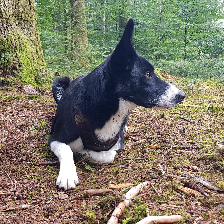

{'basenji': 0.7147415, 'kelpie': 0.11444733, 'Border_collie': 0.035584815, 'Boston_bull': 0.016291698, 'collie': 0.015621367}


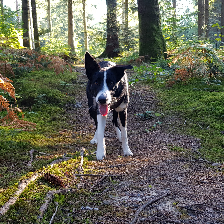

{'kelpie': 0.49364546, 'Boston_bull': 0.19770981, 'basenji': 0.07054128, 'Border_collie': 0.067368045, 'English_springer': 0.034106847}


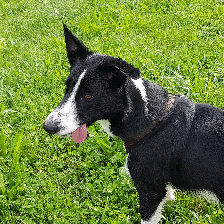

{'basenji': 0.68222165, 'kelpie': 0.08657781, 'Border_collie': 0.055974852, 'collie': 0.048486844, 'Cardigan': 0.038817674}


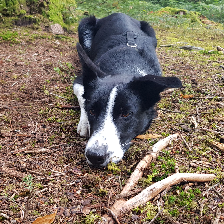

{'Border_collie': 0.2694368, 'kelpie': 0.23740125, 'Cardigan': 0.20447707, 'collie': 0.09413334, 'basenji': 0.07983525}


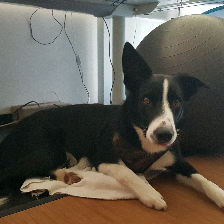

{'Border_collie': 0.26446176, 'Cardigan': 0.23145783, 'basenji': 0.16371265, 'Boston_bull': 0.105148874, 'kelpie': 0.0861909}


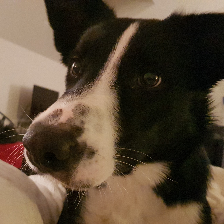

{'Border_collie': 0.47482905, 'collie': 0.35400966, 'Cardigan': 0.09269827, 'kelpie': 0.023672696, 'English_springer': 0.012147602}


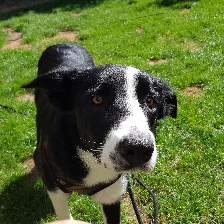

{'Appenzeller': 0.30077407, 'collie': 0.23717362, 'Border_collie': 0.20582923, 'English_springer': 0.10472482, 'Great_Dane': 0.04581791}


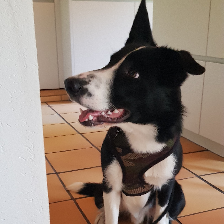

{'kelpie': 0.36523658, 'Eskimo_dog': 0.17164378, 'Border_collie': 0.12983651, 'collie': 0.11465913, 'Siberian_husky': 0.071858056}


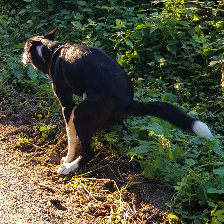

{'Greater_Swiss_Mountain_dog': 0.4212806, 'Appenzeller': 0.2296379, 'EntleBucher': 0.17881218, 'boxer': 0.03288973, 'American_Staffordshire_terrier': 0.025027372}


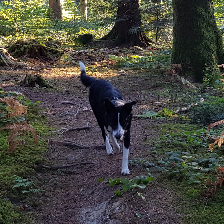

{'bluetick': 0.38613346, 'kelpie': 0.24426867, 'EntleBucher': 0.05309596, 'Eskimo_dog': 0.043495435, 'Walker_hound': 0.031634793}


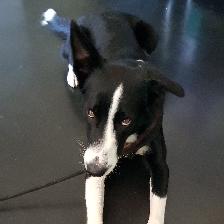

{'Border_collie': 0.27604318, 'collie': 0.2142773, 'basenji': 0.15257044, 'kelpie': 0.12197153, 'Ibizan_hound': 0.058692772}


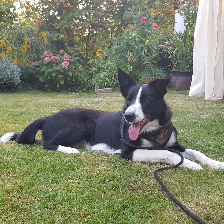

{'kelpie': 0.7900211, 'Border_collie': 0.06697501, 'Boston_bull': 0.045058392, 'basenji': 0.028630398, 'Cardigan': 0.021967184}


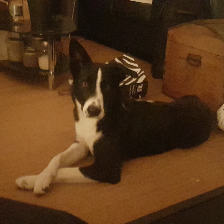

{'Cardigan': 0.6326244, 'collie': 0.14572634, 'Border_collie': 0.13092682, 'Shetland_sheepdog': 0.030862669, 'basenji': 0.0250696}


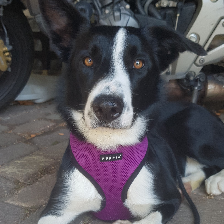

{'Border_collie': 0.7937372, 'kelpie': 0.09277891, 'collie': 0.07704401, 'Appenzeller': 0.013222954, 'Cardigan': 0.0045202277}


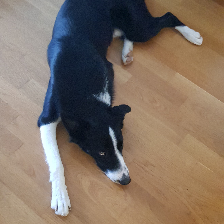

{'basenji': 0.52773505, 'Border_collie': 0.21345575, 'collie': 0.09039811, 'Cardigan': 0.07138631, 'Shetland_sheepdog': 0.031395406}


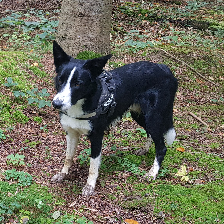

{'Border_collie': 0.5346428, 'collie': 0.35799524, 'basenji': 0.033015516, 'kelpie': 0.024301851, 'Appenzeller': 0.018192897}


In [5]:
for img in imgs:
    MyResNet50(f"data/loki/{img}").decode_predict()

In [6]:
df = MyResNet50.get_frame()
df

,basenji,kelpie,Border_collie,Boston_bull,collie,English_springer,Cardigan,Appenzeller,Great_Dane,Eskimo_dog,Siberian_husky,Greater_Swiss_Mountain_dog,EntleBucher,boxer,American_Staffordshire_terrier,bluetick,Walker_hound,Ibizan_hound,Shetland_sheepdog
1,0.714742,0.114447,0.035585,0.016292,0.015621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.070541,0.493645,0.067368,0.197710,NaN,0.034107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.682222,0.086578,0.055975,NaN,0.048487,NaN,0.038818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.079835,0.237401,0.269437,NaN,0.094133,NaN,0.204477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.163713,0.086191,0.264462,0.105149,NaN,NaN,0.231458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0.152570,0.121972,0.276043,NaN,0.214277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058693,NaN
12,0.028630,0.790021,0.066975,0.045058,NaN,NaN,0.021967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.025070,NaN,0.130927,NaN,0.145726,NaN,0.632624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030863
15,0.527735,NaN,0.213456,NaN,0.090398,NaN,0.071386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031395
16,0.033016,0.024302,0.534643,NaN,0.357995,NaN,NaN,0.018193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
MyResNet50.sort_prob()

Border_collie                     3.519102
kelpie                            2.680514
basenji                           2.478073
collie                            1.749525
Cardigan                          1.297949
Appenzeller                       0.561828
Greater_Swiss_Mountain_dog        0.421281
bluetick                          0.386133
Boston_bull                       0.364209
EntleBucher                       0.231908
Eskimo_dog                        0.215139
English_springer                  0.150979
Siberian_husky                    0.071858
Shetland_sheepdog                 0.062258
Ibizan_hound                      0.058693
Great_Dane                        0.045818
boxer                             0.032890
Walker_hound                      0.031635
American_Staffordshire_terrier    0.025027
dtype: float64

In [8]:
MyResNet50.sort_freq()

Border_collie                     6
basenji                           3
kelpie                            3
Appenzeller                       1
bluetick                          1
Greater_Swiss_Mountain_dog        1
Cardigan                          1
Boston_bull                       0
collie                            0
English_springer                  0
Shetland_sheepdog                 0
Great_Dane                        0
Ibizan_hound                      0
Siberian_husky                    0
EntleBucher                       0
boxer                             0
American_Staffordshire_terrier    0
Walker_hound                      0
Eskimo_dog                        0
dtype: int64